### Ejercicio 3: Clasificación con KNN (Diagnóstico de Cáncer de Mama)

**Tarea:** Cargar el modelo de datos breast-cancer.csv y entrenar un modelo de clasificación usando KNN para obtener un diagnóstico.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Cargar el dataset
import os

# Intentar cargar desde archivo CSV primero
if os.path.exists('breast-cancer.csv'):
    df_bc = pd.read_csv('breast-cancer.csv')
    print("✓ Dataset cargado desde archivo CSV local.")
    
    # Preprocesamiento del CSV
    if 'Unnamed: 32' in df_bc.columns:
        df_bc = df_bc.drop(['id', 'Unnamed: 32'], axis=1)
    else:
        if 'id' in df_bc.columns:
            df_bc = df_bc.drop('id', axis=1)
    
    X = df_bc.drop('diagnosis', axis=1)
    y = df_bc['diagnosis'].map({'M': 1, 'B': 0})
    
else:
    print("Archivo CSV no encontrado. Cargando dataset desde scikit-learn...")
    from sklearn.datasets import load_breast_cancer
    
    # Cargar dataset de sklearn
    cancer_data = load_breast_cancer()
    
    # Crear DataFrame
    df_bc = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
    df_bc['diagnosis'] = cancer_data.target
    
    print("✓ Dataset cargado desde scikit-learn.")
    print(f"Dimensiones: {df_bc.shape}")
    print(f"Clases: {cancer_data.target_names} (0=maligno, 1=benigno)")
    
    # Preparar X e y
    X = df_bc.drop('diagnosis', axis=1)
    y = df_bc['diagnosis']

# Mostrar información del dataset
print("\nPrimeras filas del dataset:")
print(df_bc.head())

print("\nInformación del dataset:")
print(f"  - Características: {X.shape[1]}")
print(f"  - Muestras: {X.shape[0]}")
print(f"  - Distribución de clases:")
print(f"    · Maligno (1): {sum(y == 1)} casos")
print(f"    · Benigno (0): {sum(y == 0)} casos")

# Dividir los datos ANTES de escalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Estandarizar las características
# Es importante ajustar el escalador SÓLO con los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✓ Preprocesamiento completado.")
print(f"  - Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"  - Conjunto de prueba: {X_test.shape[0]} muestras")
print("Los datos están listos para el modelo KNN.")

Archivo CSV no encontrado. Cargando dataset desde scikit-learn...
✓ Dataset cargado desde scikit-learn.
Dimensiones: (569, 31)
Clases: ['malignant' 'benign'] (0=maligno, 1=benigno)

Primeras filas del dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.24

In [9]:
# Entrenamiento del Modelo KNN
# Creamos el clasificador KNN (usaremos k=5, un valor común para empezar) 
# y lo entrenamos con los datos de entrenamiento escalados.

# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

print("✓ Modelo KNN entrenado exitosamente con k=5.")
print(f"  - Algoritmo: K-Nearest Neighbors")
print(f"  - Número de vecinos (k): 5")
print(f"  - Métrica de distancia: euclidiana (por defecto)")

✓ Modelo KNN entrenado exitosamente con k=5.
  - Algoritmo: K-Nearest Neighbors
  - Número de vecinos (k): 5
  - Métrica de distancia: euclidiana (por defecto)


RESULTADOS DE EVALUACIÓN - KNN
Precisión (Accuracy) del Modelo: 0.9561

Reporte de Clasificación:
              precision    recall  f1-score   support

 Maligno (0)       0.95      0.93      0.94        42
 Benigno (1)       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



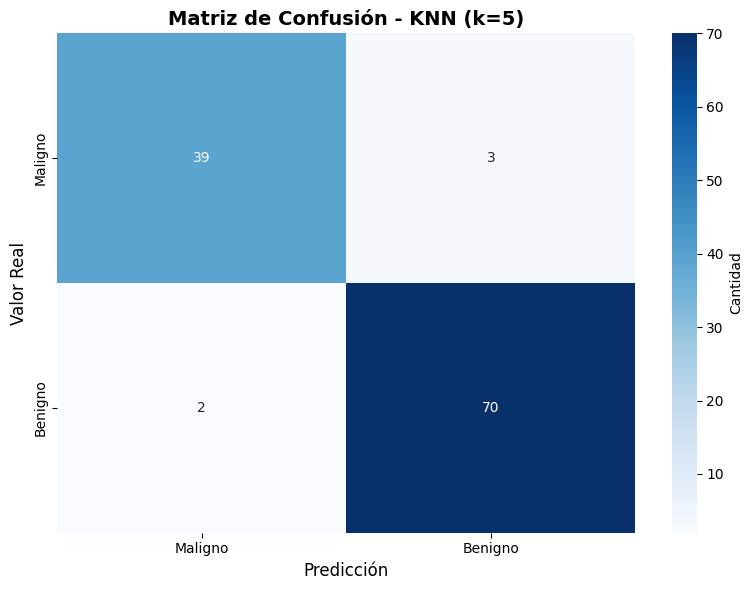


Análisis de la Matriz de Confusión:
  - Verdaderos Negativos (TN): 39
  - Falsos Positivos (FP): 3
  - Falsos Negativos (FN): 2
  - Verdaderos Positivos (TP): 70

Métricas Adicionales:
  - Sensibilidad (Recall): 0.9722
  - Especificidad: 0.9286

✓ Evaluación completada exitosamente.


In [10]:
# Evaluación del Modelo
# Evaluamos el rendimiento del modelo en el conjunto de prueba (también escalado).

# Realizar predicciones
y_pred = knn.predict(X_test_scaled)

# Calcular métricas
accuracy = accuracy_score(y_test, y_pred)

print("="*60)
print("RESULTADOS DE EVALUACIÓN - KNN")
print("="*60)
print(f"Precisión (Accuracy) del Modelo: {accuracy:.4f}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Maligno (0)', 'Benigno (1)']))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Maligno', 'Benigno'], 
            yticklabels=['Maligno', 'Benigno'],
            cbar_kws={'label': 'Cantidad'})
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Valor Real', fontsize=12)
plt.title('Matriz de Confusión - KNN (k=5)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis de la matriz de confusión
tn, fp, fn, tp = cm.ravel()
print("\nAnálisis de la Matriz de Confusión:")
print(f"  - Verdaderos Negativos (TN): {tn}")
print(f"  - Falsos Positivos (FP): {fp}")
print(f"  - Falsos Negativos (FN): {fn}")
print(f"  - Verdaderos Positivos (TP): {tp}")

# Métricas adicionales
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"\nMétricas Adicionales:")
print(f"  - Sensibilidad (Recall): {sensitivity:.4f}")
print(f"  - Especificidad: {specificity:.4f}")

print("\n✓ Evaluación completada exitosamente.")